<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Using TensorFlow Keras, Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn.

This is your "Hello World!" of TensorFlow.

### Example TensorFlow Starter Code

```python 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(3, activation='sigmoid', input_dim=2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

results = model.fit(X,y, epochs=100)

```

### Additional Written Tasks:
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
  * Binary Cross Entropy is designed to have a large error when a binary choice closer to the the wrong answer, and much smaller when it is near the correct label. This makes it ideal for a binary loss function.
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
  * A metric evaluates the quality of a model in a human interpretable way, but cannot be used to mathematically determine which way to change the weights. The Loss function is the opposite. It can be used for backpropagation to update weights, but doesn't does not have an easily understood meaning.
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 
  * According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

In [ ]:
data = { 'x1': [0,0,1,0,1,1,0],
         'x2': [0,1,0,1,0,1,0],
         'x3': [1,1,1,0,0,1,0],
         'y':  [0,1,1,1,1,0,0]
       }

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame.from_dict(data)
X = df.drop("y", axis =1)
y = df['y']

In [ ]:
X

,x1,x2,x3
0,0,0,1
1,0,1,1
2,1,0,1
3,0,1,0
4,1,0,0
5,1,1,1
6,0,0,0


In [ ]:
y

0    0
1    1
2    1
3    1
4    1
5    0
6    0
Name: y, dtype: int64

### Build a Tensor Keras Perceptron

Try to match the architecture we used on Monday - inputs nodes and one output node. Apply this architecture to the XOR-ish dataset above. 

After fitting your model answer these questions: 

Are you able to achieve the same results as a bigger architecture from the first part of the assignment? Why is this disparity the case? What properties of the XOR dataset would cause this disparity? 

Now extrapolate this behavior on a much larger dataset in terms of features. What kind of architecture decisions could we make to avoid the problems the XOR dataset presents at scale? 

*Note:* The bias term is baked in by default in the Dense layer.

In [ ]:
##### Your Code Here #####
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

model = Sequential([
    Dense(3, activation='sigmoid', input_dim=3),
    Dense(1, activation='sigmoid'),


])

model.compile(optimizer=optimizers.Nadam(), loss='binary_crossentropy', metrics=['acc'])

results = model.fit(X,y, epochs=1000, verbose=0) 


In [ ]:
results.history['acc'][-1]

0.8571428656578064

In [ ]:
### Compare 

## Try building/training a more complex MLP on a bigger dataset.

Use TensorFlow Keras & the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the canonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the Internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
# x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Now the data should be in a format you're more familiar with
# x_train.shape

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simplify the problem for now: Zero or all else.

In [ ]:
# import numpy as np

# y_temp = np.zeros(y_train.shape)
# y_temp[np.where(y_train == 0.0)[0]] = 1
# y_train = y_temp

# y_temp = np.zeros(y_test.shape)
# y_temp[np.where(y_test == 0.0)[0]] = 1
# y_test = y_temp

In [ ]:
# # A Nice Binary target for ya to work with
# y_train

### Estimating Your `net

In [ ]:
##### Your Code Here #####

from tensorflow.keras.layers import  Flatten, Dense, Dropout


In [ ]:
model = tf.keras.models.Sequential(
    [Flatten(input_shape=(28,28)),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(10)]
)

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.70783997,  0.31465337, -0.09335975,  0.2143562 ,  0.39103687,
         0.40111595,  0.01662611, -0.8705565 ,  0.49958646,  0.55049765]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.15215598, 0.1026905 , 0.06828611, 0.0928906 , 0.1108417 ,
        0.11196454, 0.07622522, 0.03139064, 0.12355083, 0.13000382]],
      dtype=float32)

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='nadam',
              loss=loss,
              metrics=['accuracy'])

In [ ]:
results = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3190 - accuracy: 0.9056
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1684 - accuracy: 0.9503
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1350 - accuracy: 0.9592
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1166 - accuracy: 0.9641
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1022 - accuracy: 0.9681
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0930 - accuracy: 0.9699
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0867 - accuracy: 0.9723
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0796 - accuracy: 0.9742
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0780 - accuracy: 0.9748
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.073

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 974us/step - loss: 0.0717 - accuracy: 0.9788


[0.07166801393032074, 0.9787999987602234]

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)
np.argmax(predictions[0])

7

In [ ]:
from matplotlib import pyplot as plt

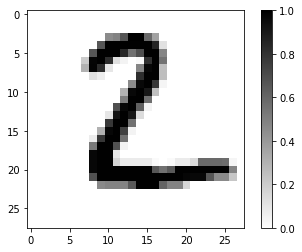

In [ ]:
plt.figure()
plt.imshow(x_test[1], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
predictions = probability_model.predict(x_test)
np.argmax(predictions[1])

2

In [ ]:
def predict(i):
    plt.figure()
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
    print()
    print(f"Prediction: {np.argmax(predictions[i])}") 

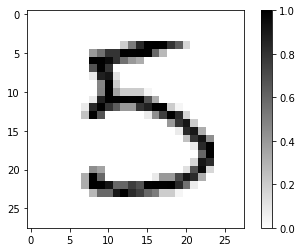


Prediction: 5


In [ ]:
predict(15)

## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?